## Sustainable Development Goals for 2023

### This exercise is to completment the Sustainable Development Goals Reporting for the year 2023

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import ConnectionPatch

In [6]:
da = pd.read_csv('SD_Report_2023.csv', index_col=0)

sd_data=pd.DataFrame(da)
                 

#Doing some previous analysis to determine the caractheristics of the data set

In [10]:
sd_data.shape

(193, 649)

In [11]:
sd_data.describe()

,Overall_Score,Overall_Rank,Spillover_Score,Spillover_Rank,Goal_1_Score,Goal_2_Score,Goal_3_Score,Goal_4_Score,Goal_5_Score,Goal_6_Score,...,Value_sdg17_secrecy,Year_sdg17_secrecy,Value_sdg17_sprofits,Year_sdg17_sprofits,Value_sdg17_statperf,Year_sdg17_statperf,Score_sdg17_statperf,FID,x,y
count,166.000000,166.000000,166.000000,166.000000,151.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,38.000000,38.0,37.000000,37.000000,185.000000,185.0,164.000000,193.000000,1.930000e+02,1.930000e+02
mean,67.549197,83.500000,86.091004,83.500000,75.234401,59.799100,69.694078,76.512968,63.285420,66.710744,...,55.079158,2022.0,-1.241378,2018.972973,68.599016,2022.0,61.800037,97.000000,2.156256e+06,2.430014e+06
std,10.295499,48.064193,15.812102,48.064193,31.169948,10.620853,20.354575,23.181919,16.399691,14.091641,...,8.050544,0.0,52.487916,0.164399,16.832624,0.0,20.511905,55.858452,7.499681e+06,3.102259e+06
min,38.676086,1.000000,35.824667,1.000000,0.000000,19.805800,12.952714,1.232250,13.054750,32.600000,...,35.875000,2022.0,-129.637000,2018.000000,24.366000,2022.0,8.473000,1.000000,-1.951159e+07,-5.204103e+06
25%,60.547488,42.250000,75.918712,42.250000,55.779250,54.007188,51.860089,61.417938,51.046250,55.237250,...,51.000000,2022.0,0.659000,2019.000000,57.903000,2022.0,46.639000,49.000000,-9.484212e+05,4.380274e+05
50%,69.376528,83.500000,93.126092,83.500000,93.300500,61.027500,75.437629,84.772875,65.869875,67.878000,...,54.737500,2022.0,4.768000,2019.000000,70.213000,2022.0,62.633000,97.000000,2.233537e+06,1.960406e+06
75%,74.947511,124.750000,97.906396,124.750000,98.950750,67.264335,85.524428,95.644063,76.137000,76.044200,...,58.693750,2022.0,12.569000,2019.000000,83.419000,2022.0,79.341000,145.000000,5.300162e+06,4.899123e+06
max,86.760595,166.000000,100.000000,166.000000,100.000000,83.401125,97.115143,99.761667,94.021667,95.057600,...,72.550000,2022.0,165.287000,2019.000000,93.636000,2022.0,91.515000,193.000000,1.988963e+07,9.604937e+06


In [7]:
#1)BY COUNTRY--------------------------------------------------

#Getting only the columns needed for the analysis
data= sd_data.get(['Name', 'Region','Overall_Score']).sort_index(ascending=1)

display(data)

# data.info()

data_count = data.groupby(['Region']).count()

# display(data_count)

absolute = data_count['Name'].tolist()/data_count['Name'].sum()

# #I need to segment and sort data values into bins. This function is also useful for going from a
# #continuous variable to a categorical variable
#x = absolute.to_list()
#cutoff =[0,25,50,75,100]
# labels = ['0-25','25-50','50-75','75-100']

# segments = pd.cut(x, bins = cutoff, labels= labels)
# final_table = pd.merge (sd_meandata, segments, how='left', on='ID')
# display(final_table)

# #data=sd_meandata.get(['Overall_Score'])

,Name,Region,Overall_Score
ID,,,
AFG,Afghanistan,E. Europe & C. Asia,49.005601
AGO,Angola,Sub-Saharan Africa,50.817985
ALB,Albania,E. Europe & C. Asia,73.506097
AND,Andorra,E. Europe & C. Asia,NaN
ARE,United Arab Emirates,MENA,69.714766
...,...,...,...
WSM,Samoa,Oceania,NaN
YEM,"Yemen, Rep.",MENA,46.846980
ZAF,South Africa,Sub-Saharan Africa,64.003198


In [3]:
#Creating intervals for Overall Score with the number of Contries falling in that interval
a2 = data[(data['Overall_Score']<=25)]['Overall_Score'].count()
b2 = data[((data['Overall_Score']>25) & (data['Overall_Score']<=50))]['Overall_Score'].count()
c2 = data[((data['Overall_Score']>50) & (data['Overall_Score']<=75))]['Overall_Score'].count()
d2 = data[((data['Overall_Score']>75) & (data['Overall_Score']<=100))]['Overall_Score'].count()

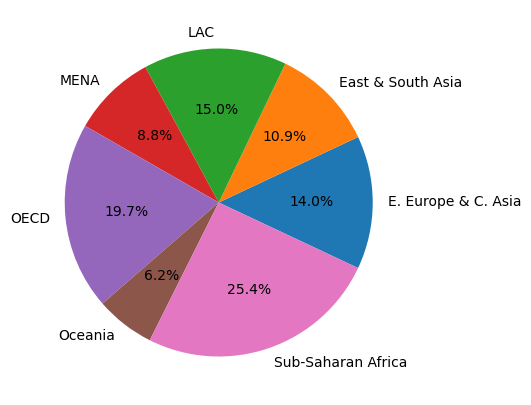

In [9]:
#-------------------------Plot--------------------------------

#1)BY EU COUNTRY IN OCDE---------------------------------------------

# # make figure and assign axis objects
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig, (ax1) = plt.subplots(1, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# # pie chart parameters
overall_ratios = absolute.tolist()
labels = data_count.index.tolist()

# # rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels)


# ax.set_ylabel("Overall Score", loc='center')
# ax.set_title("Average overall score in the SDG framework per Region")
# ax.legend(title="Overall Score")

